# Retail Sales Prediction

## Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("seaborn")

train=pd.read_csv(r"C:\Users\samya\Downloads\archive\Train.csv")
test=pd.read_csv(r"C:\Users\samya\Downloads\archive\Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


## Checking duplicate rows

In [3]:
train_duplicate=train[train.duplicated()]
train_duplicate

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [4]:
test_duplicate=test[test.duplicated()]
test_duplicate

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


#### Thus, no duplicates

## Checking for the missing values

In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

#### Thus,  there are missing values in the 'Item_Weight' and 'Outlet_Size' columns in both train and test datasets which we are going to fill with mean and mode respectively.

### 'Item_Weight'

In [7]:
train['Item_Weight'].fillna(train['Item_Weight'].median(),inplace=True)

In [8]:
test['Item_Weight'].fillna(test['Item_Weight'].median(),inplace=True)

### 'Outlet_Size'

In [9]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)

In [10]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

## Rounding off

In [11]:
train["Item_Weight"]=train["Item_Weight"].round()
test["Item_Weight"]=test["Item_Weight"].round()

train["Item_Visibility"]=train["Item_Visibility"].round(3)
test["Item_Visibility"]=test["Item_Visibility"].round(3)

train["Item_MRP"]=train["Item_MRP"].round()
test["Item_MRP"]=test["Item_MRP"].round()

## Univariate Analysis

### 'Item_Identifier'

### 'Item_Weight'

In [12]:
train["Item_Weight"].describe()

count    8523.000000
mean       12.896867
std         4.243392
min         5.000000
25%         9.000000
50%        13.000000
75%        16.000000
max        21.000000
Name: Item_Weight, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

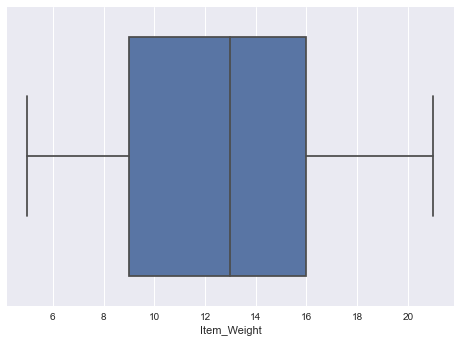

In [13]:
sb.boxplot("Item_Weight",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Weight'>

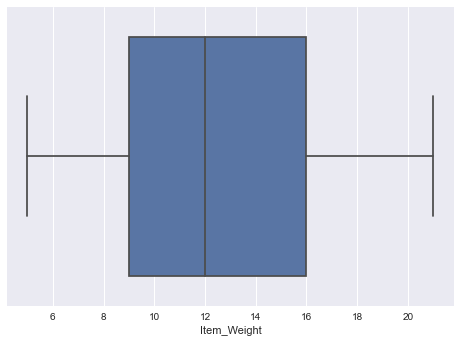

In [14]:
sb.boxplot("Item_Weight",data=test)

#### Thus, no outliers in 'Item_Weight'

### 'Item_Fat_content'

In [15]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
train["Item_Fat_Content"]=train["Item_Fat_Content"].replace(to_replace=["LF","low fat"],value="Low Fat")

In [17]:
train["Item_Fat_Content"]=train["Item_Fat_Content"].replace(to_replace=["reg"],value="Regular")

In [18]:
test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [19]:
test["Item_Fat_Content"]=test["Item_Fat_Content"].replace(to_replace=["LF","low fat"],value="Low Fat")

In [20]:
test["Item_Fat_Content"]=test["Item_Fat_Content"].replace(to_replace=["reg"],value="Regular")

In [21]:
train["Item_Fat_Content"].describe()

count        8523
unique          2
top       Low Fat
freq         5517
Name: Item_Fat_Content, dtype: object

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

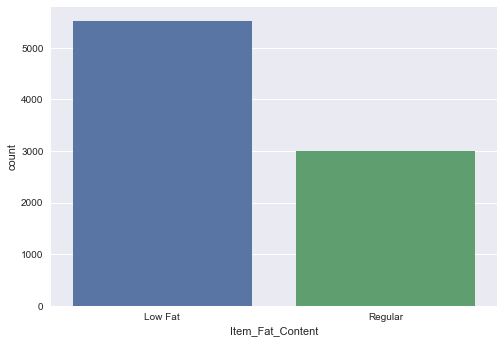

In [22]:
sb.countplot(x="Item_Fat_Content",data=train)

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

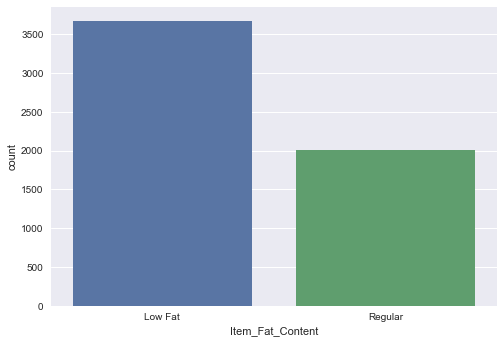

In [23]:
sb.countplot(x="Item_Fat_Content",data=test)

#### All the errors are corrected

### 'Item_Visibility'

In [24]:
train["Item_Visibility"].describe()

count    8523.000000
mean        0.066133
std         0.051588
min         0.000000
25%         0.027000
50%         0.054000
75%         0.095000
max         0.328000
Name: Item_Visibility, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

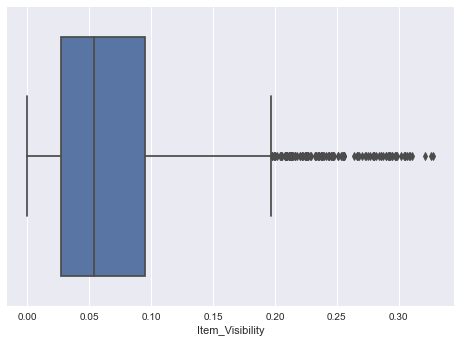

In [25]:
sb.boxplot("Item_Visibility",data=train)

In [26]:
train["Item_Visibility"].loc[train["Item_Visibility"]>0.25]=train["Item_Visibility"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

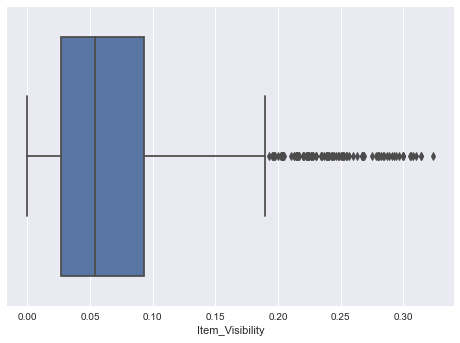

In [27]:
sb.boxplot("Item_Visibility",data=test)

In [28]:
test["Item_Visibility"].loc[test["Item_Visibility"]>0.2]=test["Item_Visibility"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


#### Thus, the outliers in 'Item_Visibility' are replaced with the median.

### 'Item_Type'

In [29]:
train["Item_Type"].describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

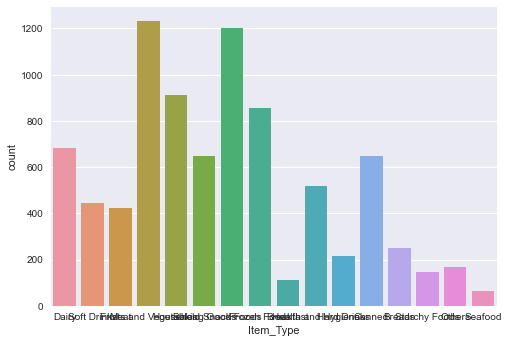

In [30]:
sb.countplot(x="Item_Type",data=train)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

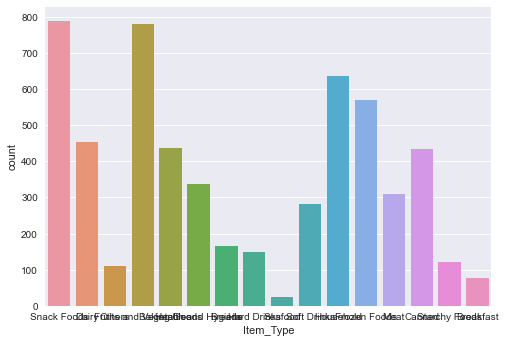

In [31]:
sb.countplot(x="Item_Type",data=test)

#### There are no errors in 'Item_Type'
### 'Item_MRP'

In [32]:
train["Item_MRP"].describe()

count    8523.000000
mean      140.989088
std        62.275770
min        31.000000
25%        94.000000
50%       143.000000
75%       186.000000
max       267.000000
Name: Item_MRP, dtype: float64

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

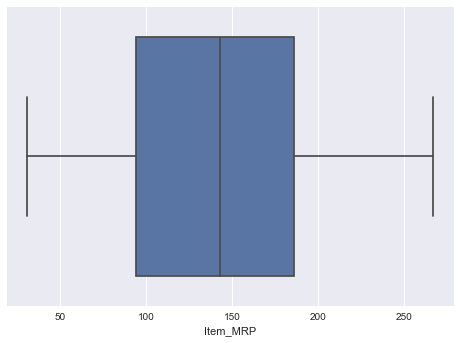

In [33]:
sb.boxplot("Item_MRP",data=train)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_MRP'>

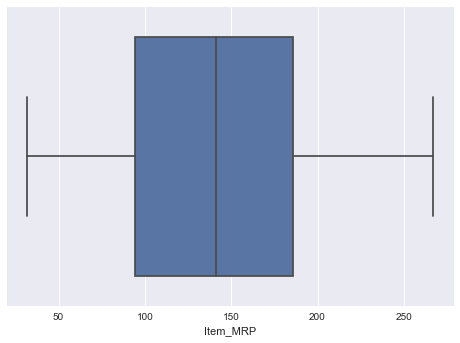

In [34]:
sb.boxplot("Item_MRP",data=test)

#### There are no outliers in 'Item_MRP'
### 'Outlet_Identifier'

In [35]:
train["Outlet_Identifier"].describe()

count       8523
unique        10
top       OUT027
freq         935
Name: Outlet_Identifier, dtype: object

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

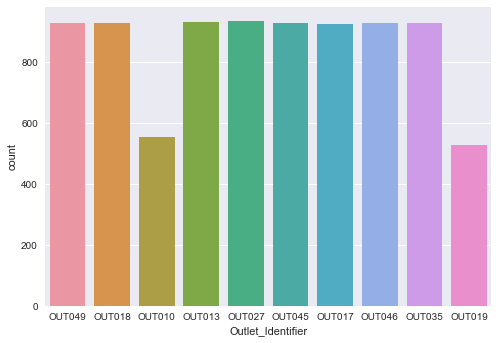

In [36]:
sb.countplot(x="Outlet_Identifier",data=train)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='count'>

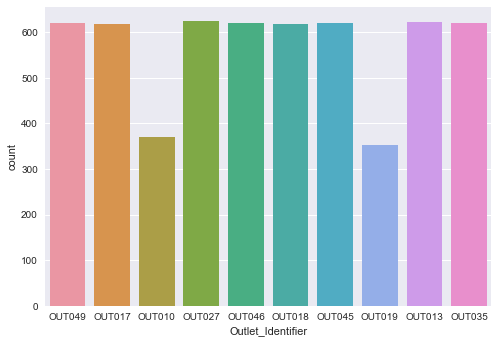

In [37]:
sb.countplot(x="Outlet_Identifier",data=test)

#### There are no errors in 'Outlet_Identifier'
### 'Outlet_Establishment_Year'

In [38]:
train["Outlet_Establishment_Year"].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

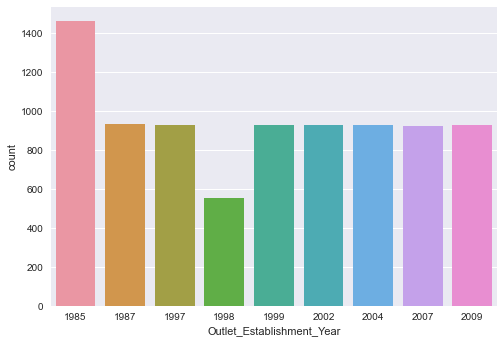

In [39]:
sb.countplot(x="Outlet_Establishment_Year",data=train)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

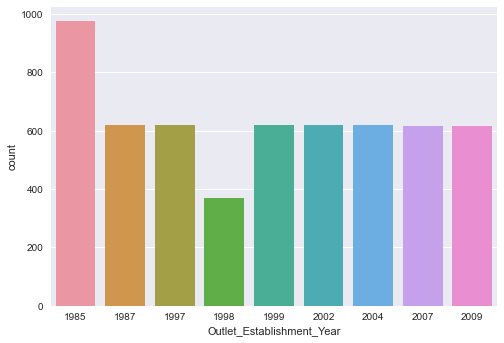

In [40]:
sb.countplot(x="Outlet_Establishment_Year",data=test)

#### As we can see, All the outlets are equal in count but the outlets established in 1985 are higher than the ones in 1998.
### 'Outlet_Size'

In [41]:
train["Outlet_Size"].describe()

count       8523
unique         3
top       Medium
freq        5203
Name: Outlet_Size, dtype: object

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

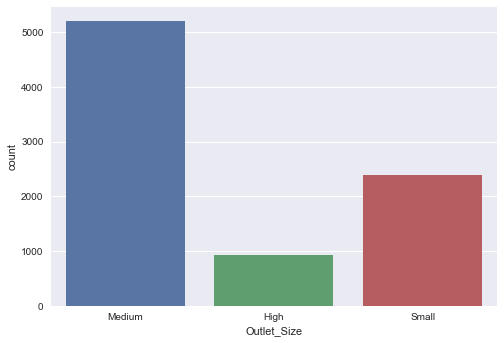

In [42]:
sb.countplot(x="Outlet_Size",data=train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

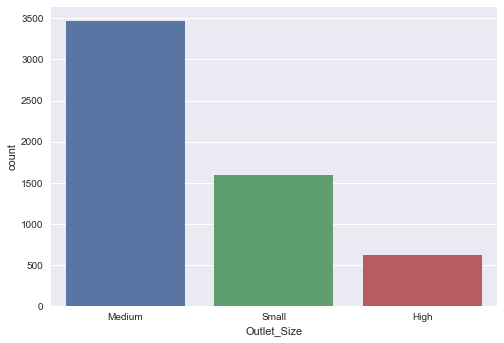

In [43]:
sb.countplot(x="Outlet_Size",data=test)

#### Medium outlets are higher than Small and High.
### 'Outlet_Location_Type'

In [44]:
train["Outlet_Location_Type"].describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

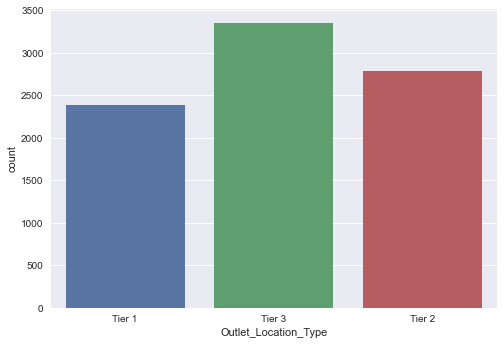

In [45]:
sb.countplot(x="Outlet_Location_Type",data=train)

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

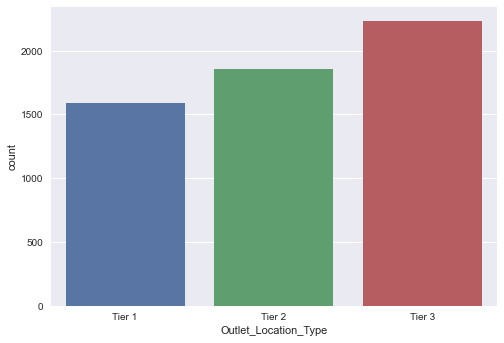

In [46]:
sb.countplot(x="Outlet_Location_Type",data=test)

#### Tier 3 is the highest while Tier 1 is the lowest in count.
### 'Outlet_Type'

In [47]:
train["Outlet_Type"].describe()

count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

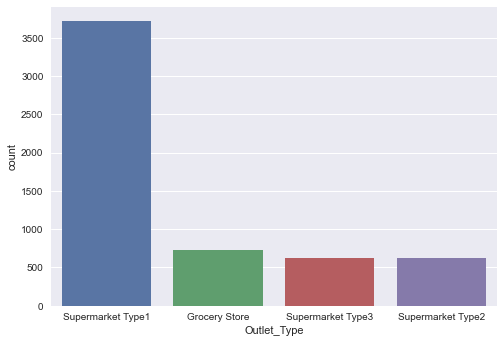

In [48]:
sb.countplot(x="Outlet_Type",data=test)

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

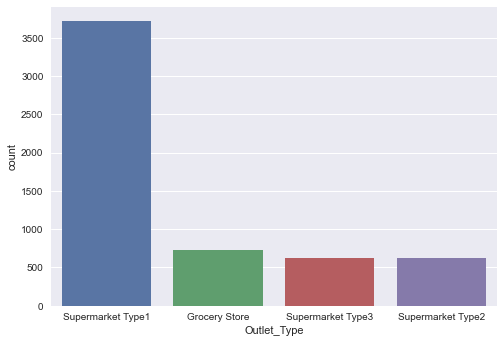

In [49]:
sb.countplot(x="Outlet_Type",data=test)

#### Supermarket Type 1 is very high in count than the other almost equally distributed outlets.

### 'Item_Outlet_Sales'

In [50]:
train["Item_Outlet_Sales"].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales'>

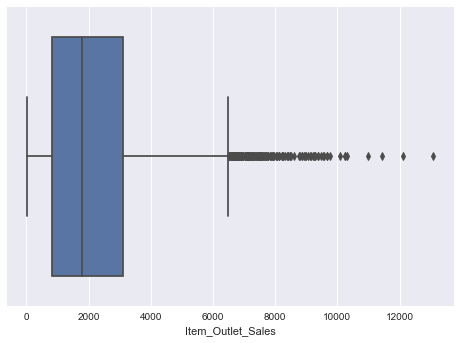

In [51]:
sb.boxplot(x="Item_Outlet_Sales",data=train)

In [52]:
train["Item_Outlet_Sales"].loc[train["Item_Outlet_Sales"]>=10000]=train["Item_Outlet_Sales"].median()

C:\Users\samya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Bivariate Analysis between the target 'Item_Outlet_Sales' and

### 'Item_Weight'

In [53]:
train.groupby("Item_Weight")["Item_Outlet_Sales"].mean()

Item_Weight
5.0     2235.687126
6.0     1987.441265
7.0     2136.616548
8.0     2044.775947
9.0     1952.346272
10.0    2248.250355
11.0    2208.256970
12.0    1998.691925
13.0    2422.288011
14.0    2132.011348
15.0    2219.104298
16.0    1971.310904
17.0    2148.856260
18.0    2219.152190
19.0    2144.696554
20.0    2140.619056
21.0    2049.898187
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

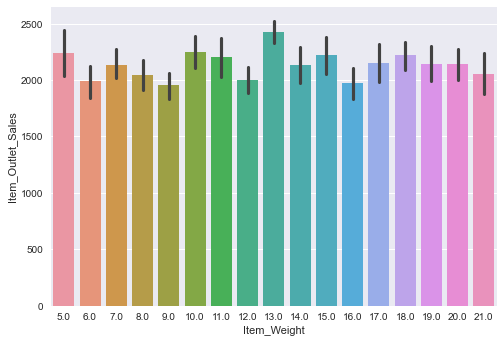

In [54]:
sb.barplot(x="Item_Weight",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x1d9fe46fd30>,
 [Text(1.1284932113525925, 0.22136637488813332, '5.0'),
  Text(0.9745898603693122, 0.6104708052522454, '6.0'),
  Text(0.6995191308774049, 0.9127830988446928, '7.0'),
  Text(0.33061860450427966, 1.1014496531188538, '8.0'),
  Text(-0.06287791438888116, 1.1482797428684808, '9.0'),
  Text(-0.46750275679610404, 1.0506860484407525, '10.0'),
  Text(-0.8287650282057982, 0.7972756913534005, '11.0'),
  Text(-1.0585283863303012, 0.4494637419558652, '12.0'),
  Text(-1.1498031054614388, 0.021279536443061683, '13.0'),
  Text(-1.0696270671411956, -0.4223717997676033, '14.0'),
  Text(-0.839034452745253, -0.7864611796563603, '15.0'),
  Text(-0.50503995758876, -1.0331672861829992, '16.0'),
  Text(-0.112170636615731, -1.1445163818317419, '17.0'),
  Text(0.31864040450837144, -1.104974340251728, '18.0'),
  Text(0.7040294252387362, -0.9093088410424782, '19.0'),
  Text(0.9859661313528586, -0.5919212682655337, '20.0'),
  Text(1.1319101371352174, -0.20317342702856

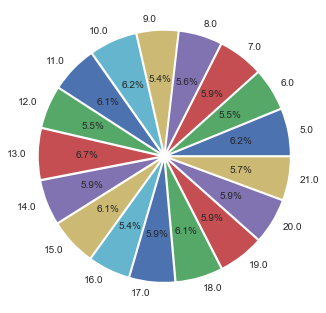

In [55]:
Item_Weight=train.groupby("Item_Weight")["Item_Outlet_Sales"].mean()
plt.pie(x=Item_Weight, autopct="%.1f%%", explode=[0.05]*len(Item_Weight), labels=Item_Weight.keys())

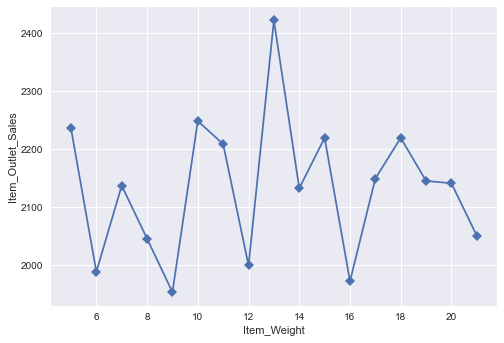

In [56]:
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Item_Weight")["Item_Outlet_Sales"].mean(),marker="D")

#### Thus, there is no specific relation between the two.
### 'Item_Fat_Content'

In [57]:
train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].mean()

Item_Fat_Content
Low Fat    2149.217123
Regular    2215.480066
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

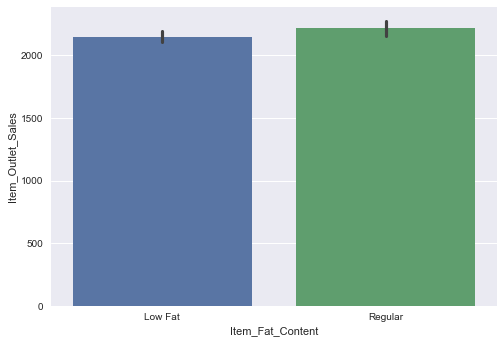

In [58]:
sb.barplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x1d9fe599850>,
 [Text(0.0274216843930683, 1.1496730192646287, 'Low Fat'),
  Text(-0.027421792033224993, -1.1496730166972202, 'Regular')],
 [Text(0.01549921291782121, 0.6498151848017466, '49.2%'),
  Text(-0.015499273757909776, -0.6498151833506026, '50.8%')])

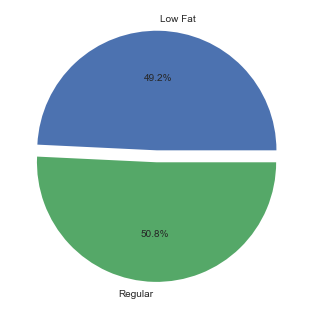

In [59]:
Item_Fat_Content=train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].mean()
plt.pie(x=Item_Fat_Content, autopct="%.1f%%", explode=[0.05]*len(Item_Fat_Content), labels=Item_Fat_Content.keys())

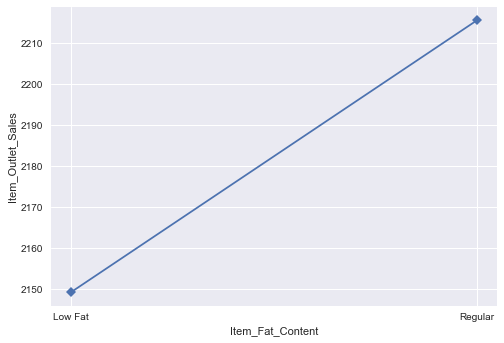

In [60]:
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].mean(),marker="D")

#### Thus, Low Fat and Regular are almost equally distributed.
### 'Item_Visibility'

In [61]:
train.groupby("Item_Visibility")["Item_Outlet_Sales"].mean()

Item_Visibility
0.000    2204.195455
0.004    2640.229900
0.005    3100.327964
0.006    2696.842482
0.007    1969.669430
            ...     
0.244     177.768600
0.245     187.089800
0.246     171.776400
0.247     356.424933
0.248     245.014400
Name: Item_Outlet_Sales, Length: 236, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Visibility'>

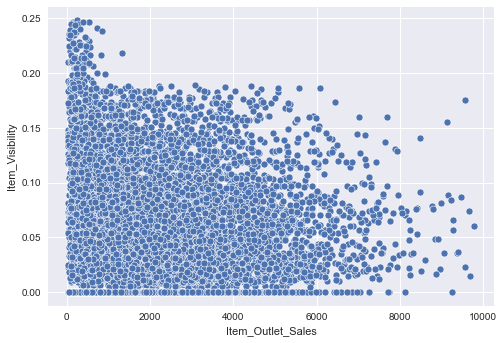

In [62]:
sb.scatterplot(x="Item_Outlet_Sales",y="Item_Visibility",data=train)

#### There is no specific relation between the two
### 'Item_Type'

In [63]:
train.groupby("Item_Type")["Item_Outlet_Sales"].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2212.078952
Dairy                    2207.755703
Frozen Foods             2132.867744
Fruits and Vegetables    2272.796929
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2237.277497
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2269.655607
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

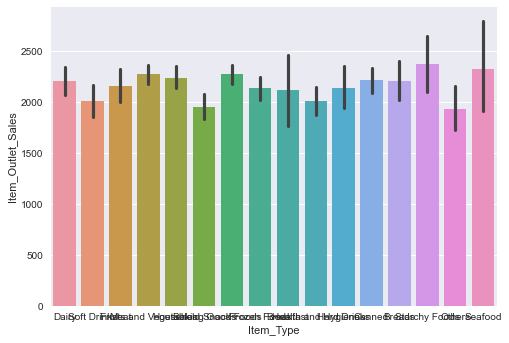

In [64]:
sb.barplot(x="Item_Type",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x1d9ff72dd90>,
 [Text(1.131907136217259, 0.20319014489005918, 'Baking Goods'),
  Text(0.9769602607002879, 0.6066701319600508, 'Breads'),
  Text(0.6705910167780873, 0.9342417718216902, 'Breakfast'),
  Text(0.2614089539546697, 1.1198952445618857, 'Canned'),
  Text(-0.19757399874526171, 1.1329009290400498, 'Dairy'),
  Text(-0.6180891866643585, 0.9697761377393196, 'Frozen Foods'),
  Text(-0.947395176166214, 0.6518760466353923, 'Fruits and Vegetables'),
  Text(-1.126753364585352, 0.2300583738871265, 'Hard Drinks'),
  Text(-1.132243737290828, -0.2013060341015601, 'Health and Hygiene'),
  Text(-0.9729736574802126, -0.6130434420573946, 'Household'),
  Text(-0.6575959522250325, -0.9434339211716171, 'Meat'),
  Text(-0.2702191398196509, -1.1178021365497242, 'Others'),
  Text(0.1713310149846384, -1.1371656358263442, 'Seafood'),
  Text(0.6181676218964817, -0.9697261423921956, 'Snack Foods'),
  Text(0.9397057539797654, -0.6629125854419428, 'Soft Drinks'),
  Text(1.123

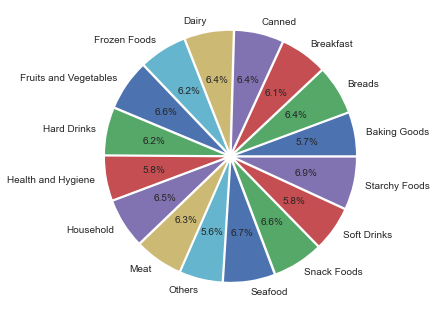

In [65]:
Item_Type=train.groupby("Item_Type")["Item_Outlet_Sales"].mean()
plt.pie(x=Item_Type, autopct="%.1f%%", explode=[0.05]*len(Item_Type), labels=Item_Type.keys())

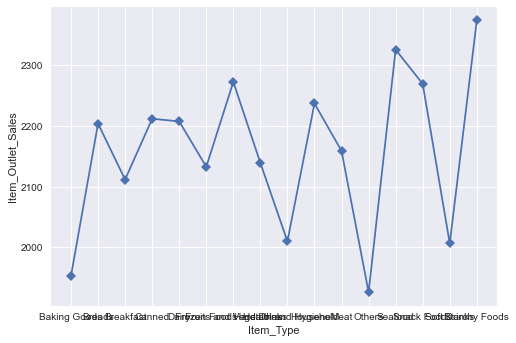

In [66]:
plt.xlabel("Item_Type")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Item_Type")["Item_Outlet_Sales"].mean(),marker="D")

#### So, for different food type there are different outlet sales.
### 'Item_MRP'

In [67]:
train.groupby("Item_MRP")["Item_Outlet_Sales"].mean()

Item_MRP
31.0      682.445000
32.0      539.131550
33.0      474.299275
34.0      514.237288
35.0      514.471058
            ...     
263.0    3910.113939
264.0    3835.371164
265.0    4444.070261
266.0    3209.988250
267.0    3047.366600
Name: Item_Outlet_Sales, Length: 229, dtype: float64

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_MRP'>

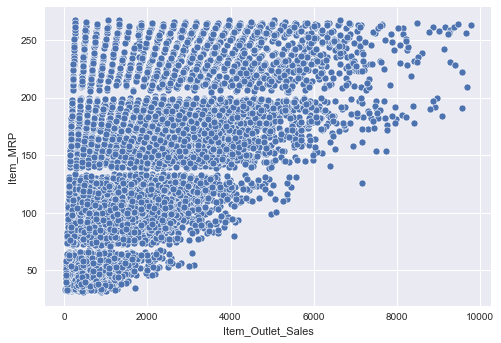

In [68]:
sb.scatterplot(x="Item_Outlet_Sales",y="Item_MRP",data=train)

#### There is almost a linear relationship between the two.
### 'Outlet_Identifier'

In [69]:
train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()

Outlet_Identifier
OUT010     339.351662
OUT013    2289.915515
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3623.772091
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

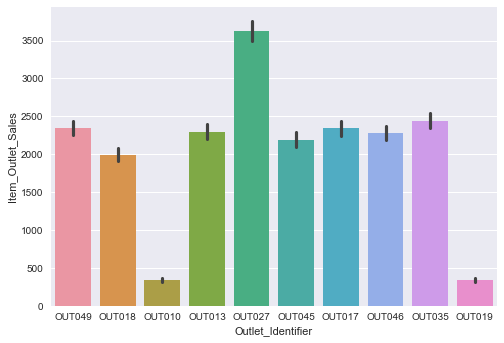

In [70]:
sb.barplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x1d9ff915280>,
 [Text(1.1483966645286847, 0.06070503191162756, 'OUT010'),
  Text(1.029442010524003, 0.5125906231763301, 'OUT013'),
  Text(0.43527047650794737, 1.0644433344619828, 'OUT017'),
  Text(-0.32514631524168114, 1.103077455886375, 'OUT018'),
  Text(-0.6961090325308807, 0.9153863746139775, 'OUT019'),
  Text(-1.0973631265020674, 0.3439391931629891, 'OUT027'),
  Text(-0.9225700202920554, -0.6865599446940642, 'OUT035'),
  Text(-0.24006130378020565, -1.124664647985055, 'OUT045'),
  Text(0.536529091984617, -1.0171708477213464, 'OUT046'),
  Text(1.0740524605736228, -0.41098821386476075, 'OUT049')],
 [Text(0.6490937669075174, 0.034311539776137316, '1.7%'),
  Text(0.5818585276874799, 0.28972513483879525, '11.3%'),
  Text(0.24602244324362238, 0.6016418846959033, '11.6%'),
  Text(-0.18377835209312413, 0.6234785620227336, '9.9%'),
  Text(-0.3934529314304978, 0.5173922986948568, '1.7%'),
  Text(-0.6202487236750814, 0.1944004135269069, '18.0%'),
  Text(-0.52145

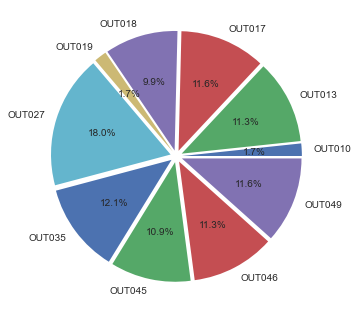

In [71]:
Outlet_Identifier=train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()
plt.pie(x=Outlet_Identifier, autopct="%.1f%%", explode=[0.05]*len(Outlet_Identifier), labels=Outlet_Identifier.keys())

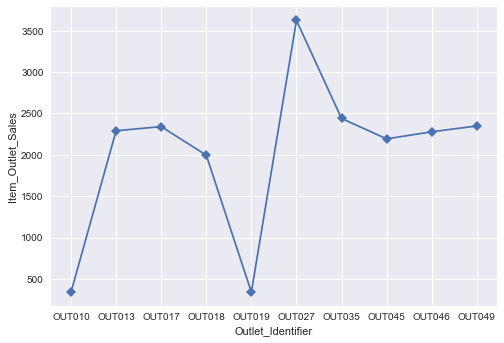

In [72]:
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean(),marker="D")

#### So, for different outlets there are different outlet sales.
### 'Outlet_Establishment_Year'

In [73]:
train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean()

Outlet_Establishment_Year
1985    2438.770334
1987    2289.915515
1997    2277.844267
1998     339.351662
1999    2348.354635
2002    2192.384798
2004    2438.841866
2007    2340.675263
2009    1995.498739
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

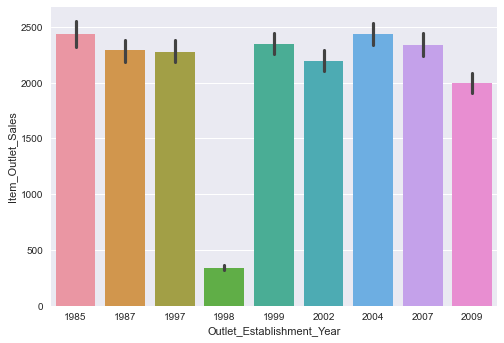

In [74]:
sb.barplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x1d9ffa5edc0>,
 [Text(1.0544344934269336, 0.4589857286141757, '1985'),
  Text(0.40962256582103157, 1.0745740335454765, '1987'),
  Text(-0.4528767578879842, 1.057072675914418, '1997'),
  Text(-0.8604416672177813, 0.7629810858176532, '1998'),
  Text(-1.107419311577994, 0.31003623714676026, '1999'),
  Text(-1.0139042837529062, -0.5426767945909483, '2002'),
  Text(-0.33953625906624096, -1.0987334202522934, '2004'),
  Text(0.5562695632708148, -1.0065108906407805, '2007'),
  Text(1.0857192149213357, -0.37909601204786963, '2009')],
 [Text(0.595984713676093, 0.2594267161732297, '13.1%'),
  Text(0.23152579807275692, 0.607367932003965, '12.3%'),
  Text(-0.2559738196758171, 0.5974758602994537, '12.2%'),
  Text(-0.48633659451439804, 0.43125017894041273, '1.8%'),
  Text(-0.6259326543701704, 0.17523787316990797, '12.6%'),
  Text(-0.5730763342951208, -0.3067303621601012, '11.7%'),
  Text(-0.19191179860265792, -0.6210232375339049, '13.1%'),
  Text(0.3144132314139388, -0

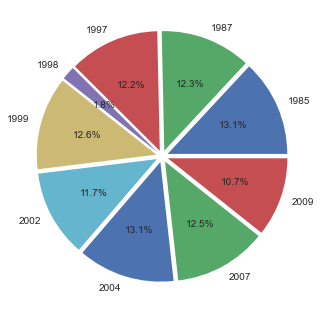

In [75]:
Outlet_Establishment_Year=train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean()
plt.pie(x=Outlet_Establishment_Year, autopct="%.1f%%", explode=[0.05]*len(Outlet_Establishment_Year), labels=Outlet_Establishment_Year.keys())

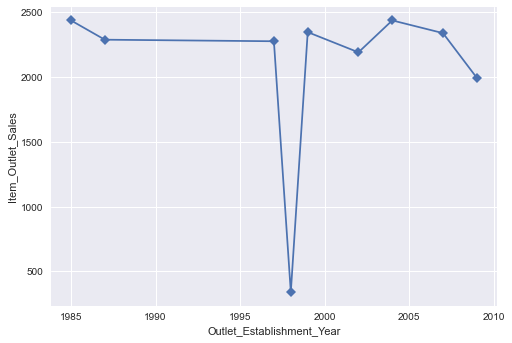

In [76]:
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean(),marker="D")

#### All the outlets have a good average outlet sales except the ones established in 1998.

### 'Outlet_Size'

In [77]:
train.groupby("Outlet_Size")["Item_Outlet_Sales"].mean()

Outlet_Size
High      2289.915515
Medium    2271.103304
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

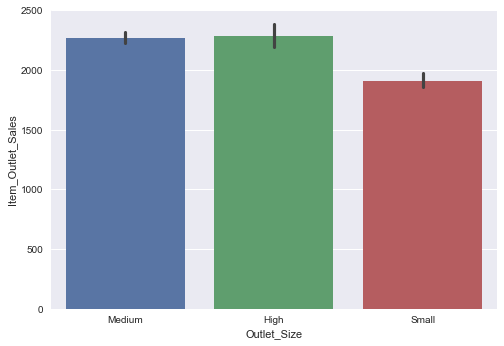

In [78]:
sb.barplot(x="Outlet_Size",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x1d9fcf954c0>,
 [Text(0.5099654798796222, 1.0307449778345499, 'High'),
  Text(-1.1307263807574286, -0.2096612788742999, 'Medium'),
  Text(0.6893379413139434, -0.9204961719991314, 'Small')],
 [Text(0.28824135819282987, 0.582594987471702, '35.4%'),
  Text(-0.6391062152107204, -0.11850420110286516, '35.1%'),
  Text(0.38962579291657673, -0.5202804450429872, '29.5%')])

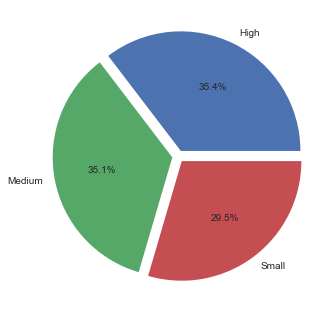

In [79]:
Outlet_Size=train.groupby("Outlet_Size")["Item_Outlet_Sales"].mean()
plt.pie(x=Outlet_Size, autopct="%.1f%%", explode=[0.05]*len(Outlet_Size), labels=Outlet_Size.keys())

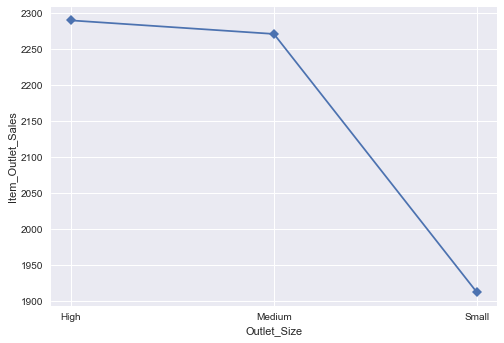

In [80]:
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Outlet_Size")["Item_Outlet_Sales"].mean(),marker="D")

#### As we can see, the small outlets have lower and the high outlets have higher outlet sales.
### 'Outlet_Location_Type'

In [81]:
train.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2257.489901
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

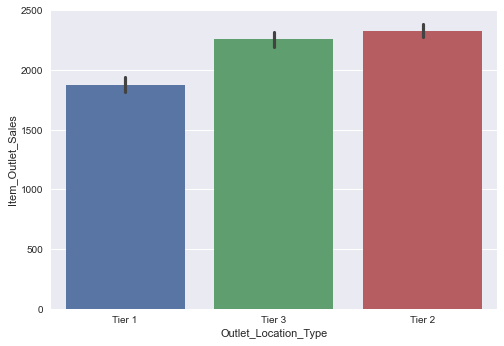

In [82]:
sb.barplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x1d9ffc40fa0>,
 [Text(0.7030843058949482, 0.910039811658929, 'Tier 1'),
  Text(-1.1303495426817136, 0.21168351697579305, 'Tier 2'),
  Text(0.5235569438870481, -1.0239082607869001, 'Tier 3')],
 [Text(0.3973954772449707, 0.5143703283289598, '29.1%'),
  Text(-0.6388932197766207, 0.11964720524718735, '36.0%'),
  Text(0.29592349002311413, -0.5787307560969435, '35.0%')])

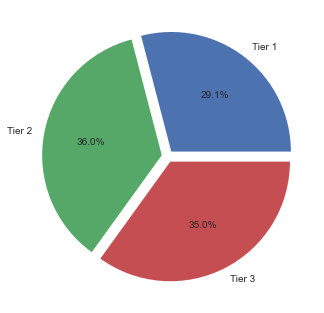

In [83]:
Outlet_Location_Type=train.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean()
plt.pie(x=Outlet_Location_Type, autopct="%.1f%%", explode=[0.05]*len(Outlet_Location_Type), labels=Outlet_Location_Type.keys())

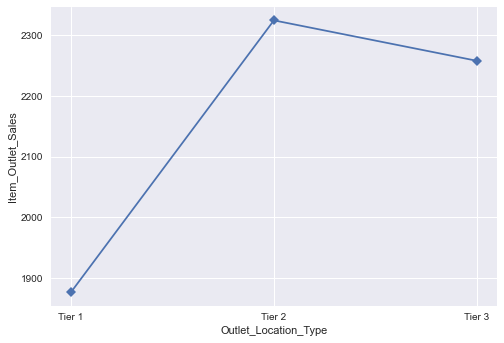

In [84]:
plt.xlabel("Outlet_Location_Type")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean(),marker="D")

#### Tier 2 and 3 have almost equal average outlet sales but Tier 1 has a bit lesser.

### 'Outlet_Type'

In [85]:
train.groupby("Outlet_Type")["Item_Outlet_Sales"].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2314.663788
Supermarket Type2    1995.498739
Supermarket Type3    3623.772091
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

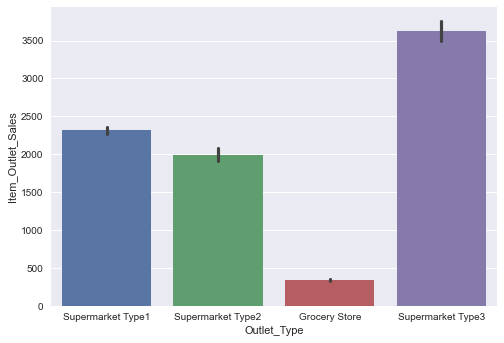

In [86]:
sb.barplot(x="Outlet_Type",y="Item_Outlet_Sales",data=train)

([<matplotlib.patches.Wedge at 0x1d9ffd4b040>,
 [Text(1.1404395510223282, 0.14797847973266415, 'Grocery Store'),
  Text(0.48340834317169207, 1.043463642755223, 'Supermarket Type1'),
  Text(-1.0729890449830444, 0.413756582239334, 'Supermarket Type2'),
  Text(0.22263979863747174, -1.1282426689603025, 'Supermarket Type3')],
 [Text(0.6445962679691419, 0.08364001028367973, '4.1%'),
  Text(0.27323080266226074, 0.589783798079039, '28.0%'),
  Text(-0.6064720689034597, 0.23386241604831917, '24.1%'),
  Text(0.12583988618639705, -0.6377023781079969, '43.8%')])

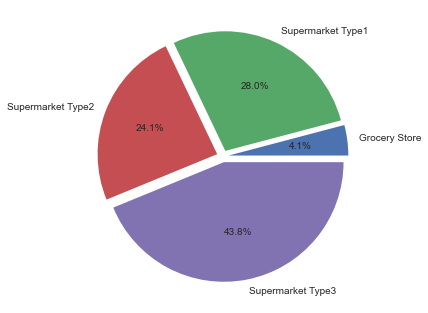

In [87]:
Outlet_Type=train.groupby("Outlet_Type")["Item_Outlet_Sales"].mean()
plt.pie(x=Outlet_Type, autopct="%.1f%%", explode=[0.05]*len(Outlet_Type), labels=Outlet_Type.keys())

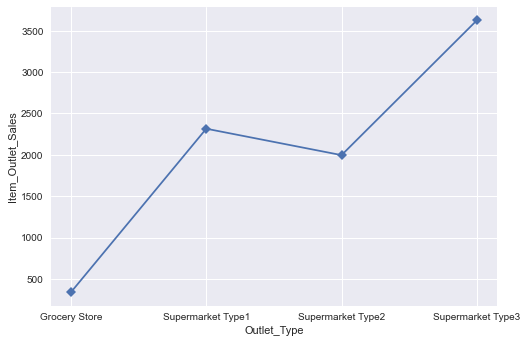

In [88]:
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.plot(train.groupby("Outlet_Type")["Item_Outlet_Sales"].mean(),marker="D")

#### Supermarket 3 type have a lot higher while Grocery Stores have very less average outlet sales.

## Encoding the Categorical variables

In [89]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.896867,0.064644,140.989088,1997.831867,2172.587580
std,4.243392,0.048467,62.275770,8.371760,1684.387192
min,5.000000,0.000000,31.000000,1985.000000,33.290000
25%,9.000000,0.027000,94.000000,1987.000000,834.247400
50%,13.000000,0.054000,143.000000,1999.000000,1794.331000
75%,16.000000,0.093000,186.000000,2004.000000,3095.970000
max,21.000000,0.248000,267.000000,2009.000000,9779.936200


In [90]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [91]:
train["Item_Fat_Content"]=le.fit_transform(train["Item_Fat_Content"])
train["Item_Type"]=le.fit_transform(train["Item_Type"])
train["Outlet_Identifier"]=le.fit_transform(train["Outlet_Identifier"])
train["Outlet_Establishment_Year"]=le.fit_transform(train["Outlet_Establishment_Year"])
train["Outlet_Size"]=le.fit_transform(train["Outlet_Size"])
train["Outlet_Location_Type"]=le.fit_transform(train["Outlet_Location_Type"])
train["Outlet_Type"]=le.fit_transform(train["Outlet_Type"])
train["Item_Identifier"]=le.fit_transform(train["Item_Identifier"])

In [92]:
test["Item_Fat_Content"]=le.fit_transform(test["Item_Fat_Content"])
test["Item_Type"]=le.fit_transform(test["Item_Type"])
test["Outlet_Identifier"]=le.fit_transform(test["Outlet_Identifier"])
test["Outlet_Establishment_Year"]=le.fit_transform(test["Outlet_Establishment_Year"])
test["Outlet_Size"]=le.fit_transform(test["Outlet_Size"])
test["Outlet_Location_Type"]=le.fit_transform(test["Outlet_Location_Type"])
test["Outlet_Type"]=le.fit_transform(test["Outlet_Type"])
test["Item_Identifier"]=le.fit_transform(test["Item_Identifier"])

## Heatmap

<AxesSubplot:>

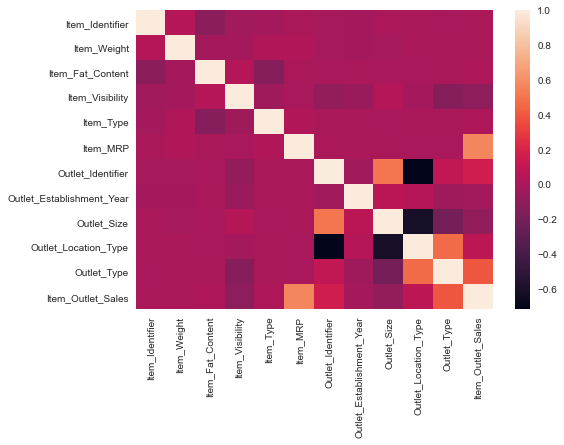

In [93]:
sb.heatmap(train.corr())

## High Correlation filter

In [94]:
corr_test=test.corr().abs()
corr_test=corr_test.where(np.triu(np.ones(corr_test.shape),k=1).astype(np.bool))
corr_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,NaN,0.050821,0.105690,0.063801,0.003236,0.007645,0.010162,0.013450,0.004379,0.011657,0.009553
Item_Weight,NaN,NaN,0.043334,0.020129,0.031600,0.044870,0.020652,0.051690,0.006215,0.017453,0.021233
Item_Fat_Content,NaN,NaN,NaN,0.029295,0.160149,0.019197,0.003881,0.003311,0.000652,0.005827,0.003864
Item_Visibility,NaN,NaN,NaN,NaN,0.035350,0.005034,0.055052,0.052309,0.022125,0.010545,0.055445
Item_Type,NaN,NaN,NaN,NaN,NaN,0.060945,0.000333,0.001545,0.003729,0.000584,0.006179
Item_MRP,NaN,NaN,NaN,NaN,NaN,NaN,0.006314,0.005519,0.011659,0.001711,0.003322
Outlet_Identifier,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030916,0.504545,0.716113,0.099937
Outlet_Establishment_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070810,0.041714,0.040576
Outlet_Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.614284,0.201538
Outlet_Location_Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.467299


In [95]:
drop_test=[column for column in corr_test.columns if any(corr_test[column]>0.5)]
test=test.drop(test[drop_test],1)

In [96]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type
0,1103,21.0,0,0.008,13,108.0,9,4,1
1,1067,8.0,1,0.038,4,87.0,2,7,1
2,1406,15.0,0,0.100,11,242.0,0,3,0
3,809,7.0,0,0.015,13,155.0,2,7,1
4,1184,12.0,1,0.119,4,234.0,5,0,3


#### Thus, 'Outlet_Size' and 'Outlet_Location_type' are the two dependent variables which are dropped by the high correlation filter. Therefore, we have to drop them in the train data too.

In [97]:
train=train.drop("Outlet_Size",axis=1)
train=train.drop(["Outlet_Location_Type"],axis=1)

## Converting train data into x and y

In [98]:
x=train.drop(["Item_Outlet_Sales"],axis=1)
y=train["Item_Outlet_Sales"]
y=np.log(y)

## Scaling the data

In [99]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()

scaled_x=mms.fit_transform(x)
x=pd.DataFrame(scaled_x,columns=x.columns)

scaled_test=mms.fit_transform(test)
test=pd.DataFrame(scaled_test,columns=test.columns)

In [100]:
x.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type
0,-1.388514,-0.918392,-0.738147,-1.003714,-0.766479,1.750557,1.507813,0.076668,-0.252658
1,-1.717991,-1.625415,1.354743,-0.941812,1.608963,-1.493270,-0.607071,1.541783,1.002972
2,-0.262057,1.202677,-0.738147,-0.983080,0.658786,0.016234,1.507813,0.076668,-0.252658
3,0.759769,1.438352,1.354743,-1.333855,-0.291391,0.658576,-1.664513,-0.289611,-1.508289
4,1.151580,-0.918392,-0.738147,-1.333855,0.421242,-1.396919,-1.312032,-1.022168,-0.252658


In [101]:
y.head()

0    8.225540
1    6.094524
2    7.648392
3    6.596300
4    6.902446
Name: Item_Outlet_Sales, dtype: float64

In [102]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Type
0,0.739896,1.971892,-0.740811,-1.214115,1.366916,-0.534259,1.507689,0.077048,-0.252769
1,0.659085,-1.076486,1.349873,-0.540695,-0.766450,-0.874037,-0.959749,1.175901,-0.252769
2,1.420050,0.564949,-0.740811,0.851038,0.892835,1.633849,-1.664731,-0.289236,-1.507994
3,0.079943,-1.310976,-0.740811,-1.056984,1.366916,0.226197,-0.959749,1.175901,-0.252769
4,0.921719,-0.138523,1.349873,1.277537,-0.766450,1.504410,0.097725,-1.388089,2.257683


## Evaluation Metric

In [103]:
from sklearn.metrics import mean_squared_log_error as mse
def error(true,pred):
    return np.sqrt(mse(true,pred))

## Creating train and test data for x and y

In [104]:
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y,random_state=20)

In [105]:
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((6392, 9), (6392,), (2131, 9), (2131,))

## Model Building

### LinearRegression

In [106]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(train_x,train_y)
tlr=lr.predict(train_x)

plr=lr.predict(test_x)
plr=pd.DataFrame(plr,columns=["pred"])
plr["pred"]=plr["pred"].apply(lambda x:0 if x<0 else x)

lr_train=lr.score(train_x,train_y)
print("Training score=",100*lr_train,"%")

Training score= 55.042789100213405 %


In [107]:
score_lr=lr.score(test_x,test_y)
print("Test score=",100*score_lr,"%")

Test score= 55.43352576851558 %


C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

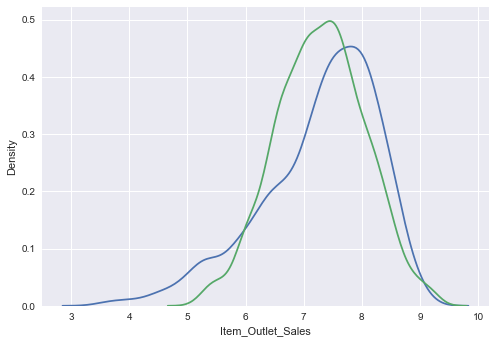

In [108]:
sb.distplot(test_y,hist=False)
sb.distplot(plr,hist=False)

In [109]:
pred_lr=lr.predict(test)
pred_lr=pd.DataFrame(pred_lr,columns=["pred"])

### KNNRegressor

In [110]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()

kn.fit(train_x,train_y)
tkn=kn.predict(train_x)

pkn=kn.predict(test_x)
pkn=pd.DataFrame(pkn,columns=["pred"])

train_kn=kn.score(train_x,train_y)
print("Training score=",100*train_kn,"%")

Training score= 77.26997639920232 %


In [111]:
score_kn=kn.score(test_x,test_y)
print("Test score=",100*score_kn,"%")

Test score= 66.53336874875237 %


C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

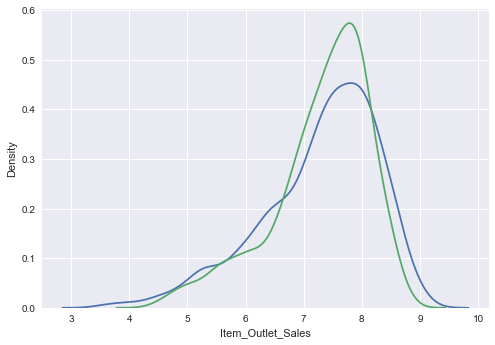

In [112]:
sb.distplot(test_y,hist=False)
sb.distplot(pkn,hist=False)

In [113]:
pred_kn=kn.predict(test)
pred_kn=pd.DataFrame(pred_kn,columns=["pred"])

### DecisionTreeRegressor

In [114]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

dt.fit(train_x,train_y)
tdt=dt.predict(train_x)

pdt=dt.predict(test_x)
pdt=pd.DataFrame(pdt,columns=["pred"])

train_dt=dt.score(train_x,train_y)
print("Training score=",100*train_dt,"%")

Training score= 100.0 %


In [115]:
score_dt=dt.score(test_x,test_y)
print("Test score=",100*score_dt,"%")

Test score= 43.291819014039746 %


C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

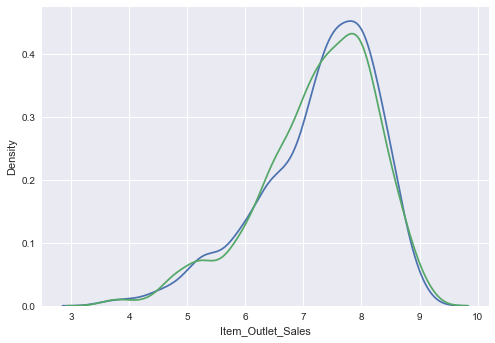

In [116]:
sb.distplot(test_y,hist=False)
sb.distplot(pdt,hist=False)

In [117]:
pred_dt=dt.predict(test)
pred_dt=pd.DataFrame(pred_dt,columns=["pred"])

### RandomForestRegressor

In [118]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

rf.fit(train_x,train_y)
trf=rf.predict(train_x)

prf=rf.predict(test_x)
prf=pd.DataFrame(prf,columns=["pred"])
test_y=pd.DataFrame(test_y)

train_rf=rf.score(train_x,train_y)
print("Training score=",100*train_rf,"%")

Training score= 95.73110176356168 %


In [119]:
score_rf=rf.score(test_x,test_y)
print("Test score=",100*score_rf,"%")

Test score= 71.11243900168715 %


C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

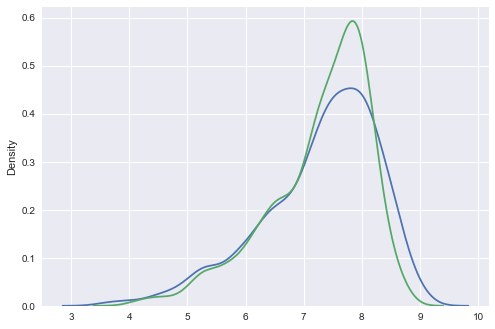

In [120]:
sb.distplot(test_y,hist=False)
sb.distplot(prf,hist=False)

In [121]:
pred_rf=rf.predict(test)
pred_rf=pd.DataFrame(pred_rf,columns=["pred"])

### XGBRegressor

In [122]:
from xgboost import XGBRegressor
xr=XGBRegressor()

xr.fit(train_x,train_y)
txr=xr.predict(train_x)

pxr=xr.predict(test_x)
pxr=pd.DataFrame(pxr,columns=["pred"])
pxr["pred"]=pxr["pred"].apply(lambda x:0 if x<0 else x)

train_xr=xr.score(train_x,train_y)
print("Training score=",100*train_xr,"%")

Training score= 89.43287848270704 %


In [123]:
score_xr=xr.score(test_x,test_y)
print("Test score=",100*score_xr,"%")

Test score= 70.12140525751602 %


C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

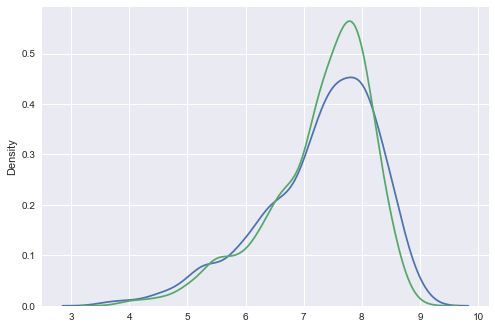

In [124]:
sb.distplot(test_y,hist=False)
sb.distplot(pxr,hist=False)

In [125]:
pred_xr=xr.predict(test)
pred_xr=pd.DataFrame(pred_xr,columns=["pred"])
pred_xr["pred"]=pred_xr["pred"].apply(lambda x:0 if x<0 else x)

## Ensembling the models

In [126]:
from statistics import mean
from sklearn.metrics import r2_score
train_ens=np.array([])
test_ens=np.array([])

for i in range(0,len(train_x)):
    train_ens=np.append(train_ens,mean([tdt[i],tdt[i],trf[i]]))

for i in range(0,len(test_x)):
    test_ens=np.append(test_ens,mean([prf["pred"][i],pxr["pred"][i]]))

score_train=r2_score(train_y,train_ens)
score_test=r2_score(test_y,test_ens)

print("Ensembled train score=",100*score_train,"%")
print("Ensembled test score=",100*score_test,"%")

Ensembled train score= 99.52567797372907 %
Ensembled test score= 71.59483207955408 %


In [127]:
final_prediction=np.array([])
for i in range(0,len(test)):
    final_prediction=np.append(final_prediction,mean([pred_rf["pred"][i],pred_rf["pred"][i],pred_dt["pred"][i]]))

final_prediction=pd.DataFrame(final_prediction,columns=["pred"])
final_prediction["pred"]=final_prediction["pred"].apply(lambda x:100 if x<0 else x)
final_prediction["pred"]=final_prediction["pred"].apply(lambda x:np.exp(x))

final_prediction.head()

,pred
0,1290.529858
1,1528.698644
2,429.137508
3,2594.894072
4,5838.973426


C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

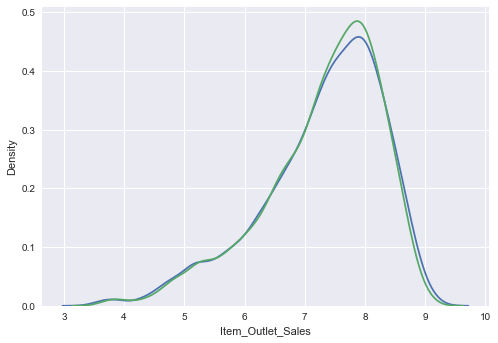

In [128]:
sb.distplot(train_y,hist=False)
sb.distplot(train_ens,hist=False)

C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\samya\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

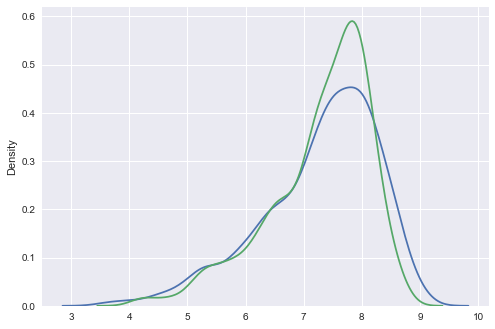

In [129]:
sb.distplot(test_y,hist=False)
sb.distplot(test_ens,hist=False)

#### Thus, final_prediction depicts the final Retail Sales prediction